In [8]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [9]:
#@title Sistema de Ecuaciones Diferenciales
def SIR(t, y, params):
    
    gamma, beta = params
    ds = -beta*y[0]*y[1]
    di = beta*y[0]*y[1] - gamma*y[0]
    dr = gamma*y[1]
    
    return np.array([ds,di,dr])
    #return np.array([ds,di,dr])


    


In [26]:
#@title Integrador de Ecuaciones Diferenciales
def RK4(f, ci, t0, tf, h, params):

    t = np.arange(t0, tf, h)
    nP = t.shape[0]
    nF = ci.shape[0]

    x = np.zeros((nP, nF))
    k = np.zeros((4, nF))

    x[0] = ci

    for i in range(nP-1):

        k[0] = h*f(t0, x[i], params)
        k[1] = h*f(t0 + h/2, x[i] + k[0]/2, params)
        k[2] = h*f(t0 + h/2, x[i] + k[1]/2, params)
        k[3] = h*f(t0 + h, x[i] + k[2], params)

        x[i + 1] = x[i] + (k[0] + 2*k[1] + 2*k[2] + k[3])/6


    return t,x
    


In [27]:
%matplotlib inline
def grafica(sol):

    t = sol[0]
    s = np.array([i for i,j,k in sol[1]]) # sol[1][:,0]
    i = np.array([j for i,j,k in sol[1]]) # sol[1][:,1]
    r = np.array([k for i,j,k in sol[1]]) # sol[1][:,2]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(t, s, "b.-",label=r"Susceptibles")
    ax.plot(t, i, "r.-",label=r"Infecious")
    ax.plot(t, r, "g.-",label=r"Recovereds")


    ax.set_xlabel(r"Time")
    ax.set_ylabel(r"Susceptibles, Infecious, Recovereds")
    ax.legend()


    fig.suptitle("SIR epidemic without births or deaths")




In [30]:
#@title Condiciones iniciales y parametros

# condiciones iniciales
# ci = np.array((s(0), i(0), r(0)))
ci  = np.array((0.99, 0.01, 0.0))

# params = np.array(gamma, beta)
params =  np.array((0.8,0.1))

t0, tf, h = 1,740, 1*1e-2



In [31]:
#@title Cálculo de las coordenadas

tci = time.time()

sol = RK4(SIR, ci, t0, tf, h, params)

tcf = time.time()

C:\Users\cterr\AppData\Local\Temp\ipykernel_26548\3326406775.py:5: RuntimeWarning: overflow encountered in scalar multiply
  ds = -beta*y[0]*y[1]
C:\Users\cterr\AppData\Local\Temp\ipykernel_26548\3326406775.py:6: RuntimeWarning: overflow encountered in scalar multiply
  di = beta*y[0]*y[1] - gamma*y[0]


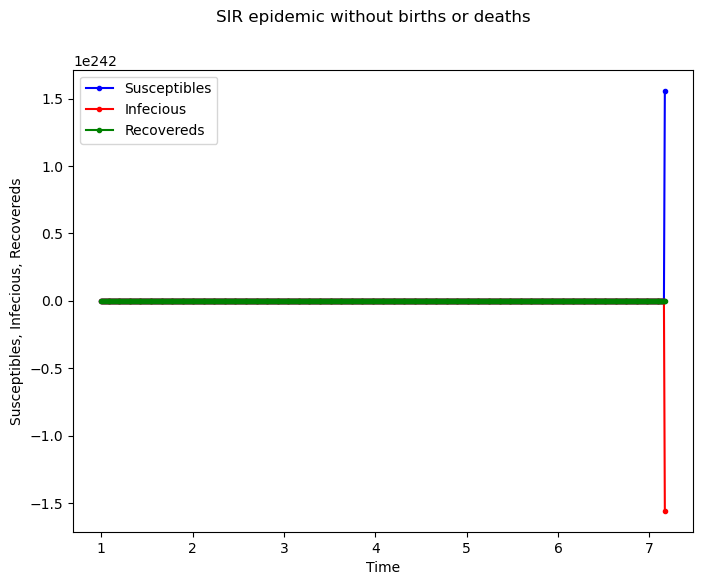

In [32]:
grafica(sol)